In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.datasets

In [2]:
data = pd.read_csv('df_cons_SL_l.csv')
data = pd.get_dummies(data, columns=["month"])

y = data['lipophylic_toxins']
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
print(f"class encoding: ['neg','poz'] -> {le.transform(['neg','poz'])}")

X = data.drop(['lipophylic_toxins'], axis='columns')
# X = pd.get_dummies(X, columns=["month"])
X_display = X.copy()  # used for SHAP visualization so we can show unscaled values
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X

class encoding: ['neg','poz'] -> [0 1]


,DSP,Dinophysis caudata,Dinophysis fortii,Phalacroma rotundatum,Dinophysis sacculus,Dinophysis tripos,sun [h],air temp,wind strength,precipitation,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-0.244039,-0.264934,-0.154066,0.119027,-0.152659,-0.11446,1.159133,1.346473,0.265639,-0.951528,...,-0.16507,-0.252923,-0.316535,-0.354081,2.628515,-0.371251,-0.426401,-0.40888,-0.318223,-0.196386
1,-0.305116,-0.285843,-0.154066,-0.428415,-0.164455,-0.11446,1.108174,1.304213,0.418360,-0.881781,...,-0.16507,-0.252923,-0.316535,-0.354081,2.628515,-0.371251,-0.426401,-0.40888,-0.318223,-0.196386
2,-0.244039,-0.285843,-0.142914,0.058200,-0.164455,-0.11446,1.167626,1.432683,0.406612,-1.009964,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,2.693599,-0.426401,-0.40888,-0.318223,-0.196386
3,-0.291235,-0.285843,-0.154066,-0.337175,-0.164455,-0.11446,0.651244,0.792871,0.371369,1.033428,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,-0.371251,2.345208,-0.40888,-0.318223,-0.196386
4,-0.316221,-0.285843,-0.165218,-0.489242,-0.164455,-0.11446,-0.113136,0.369430,2.027804,0.769521,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,-0.371251,2.345208,-0.40888,-0.318223,-0.196386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0.072452,-0.181300,0.169341,0.727295,-0.164455,-0.11446,-1.652090,-1.338706,-0.615444,-0.176773,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,-0.371251,-0.426401,-0.40888,3.142451,-0.196386
1127,-0.177409,-0.285843,0.002062,0.119027,-0.164455,-0.11446,-1.652090,-1.338706,-0.615444,-0.176773,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,-0.371251,-0.426401,-0.40888,3.142451,-0.196386
1128,-0.288459,-0.285843,-0.165218,-0.185108,-0.164455,-0.11446,-1.692857,-1.951472,-0.016308,1.048508,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,-0.371251,-0.426401,-0.40888,-0.318223,5.092011
1129,-0.149647,-0.285843,-0.053698,0.423161,-0.164455,-0.11446,-1.692857,-1.951472,-0.016308,1.048508,...,-0.16507,-0.252923,-0.316535,-0.354081,-0.380443,-0.371251,-0.426401,-0.40888,-0.318223,5.092011


In [3]:
# dset = sklearn.datasets.load_iris()
# X = pd.DataFrame(dset.data, columns=dset.feature_names)
# y = dset.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.25)

nn = MLPClassifier(hidden_layer_sizes=(3,3), solver='lbfgs', max_iter=5000)
model = nn.fit(X_train.to_numpy(), y_train)

First, visualize the impact of all features on both classes in one chart. We are using KernelExplainer but simpler general Explainer should be also tested once the SHAP code fixes all bugs.

**Note: SHAP explanations change between runs because of sampling and probably other random factors!**

  0%|          | 0/283 [00:00<?, ?it/s]

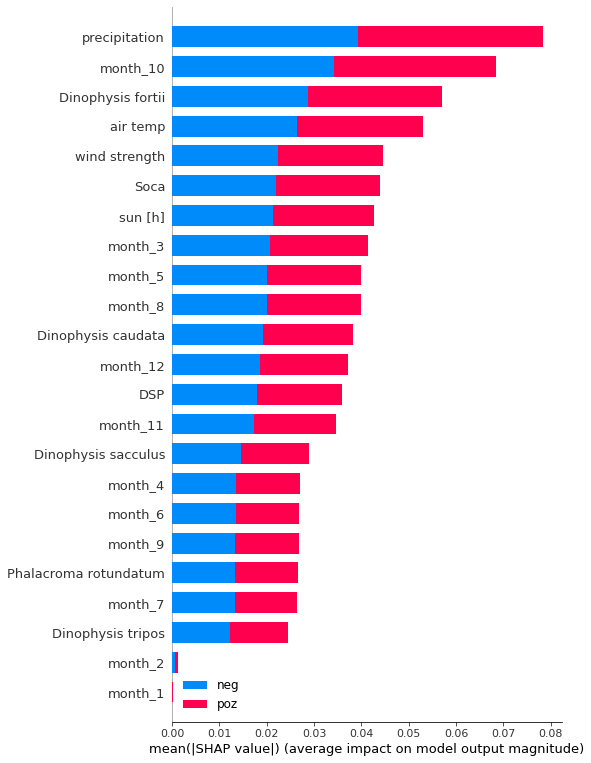

In [5]:
import shap
import warnings
warnings.filterwarnings("ignore")
shap.initjs()

explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_test,20))
shap_values = explainer.shap_values(X_test, nsamples=50)
shap.summary_plot(shap_values, X_test, max_display=len(X.columns), class_names=le.classes_)

Now for each class separately. We observe the impact of features on the returned model's probability for a given class.

  0%|          | 0/283 [00:00<?, ?it/s]

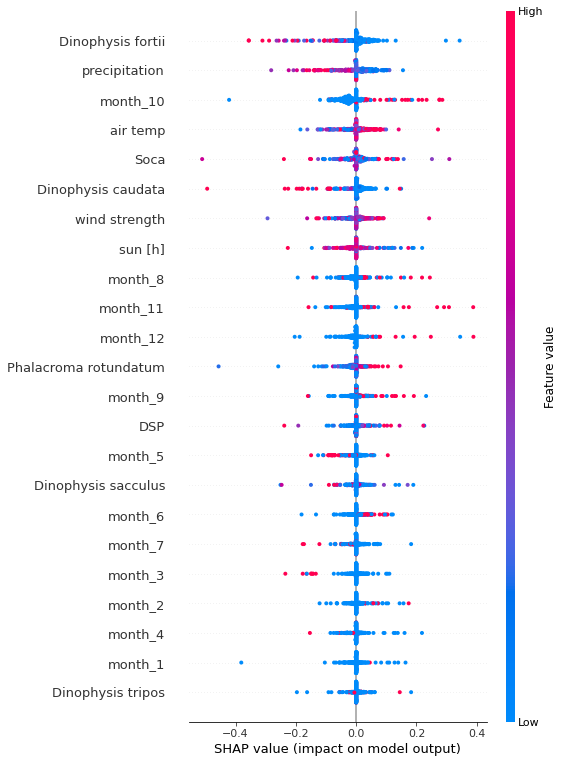

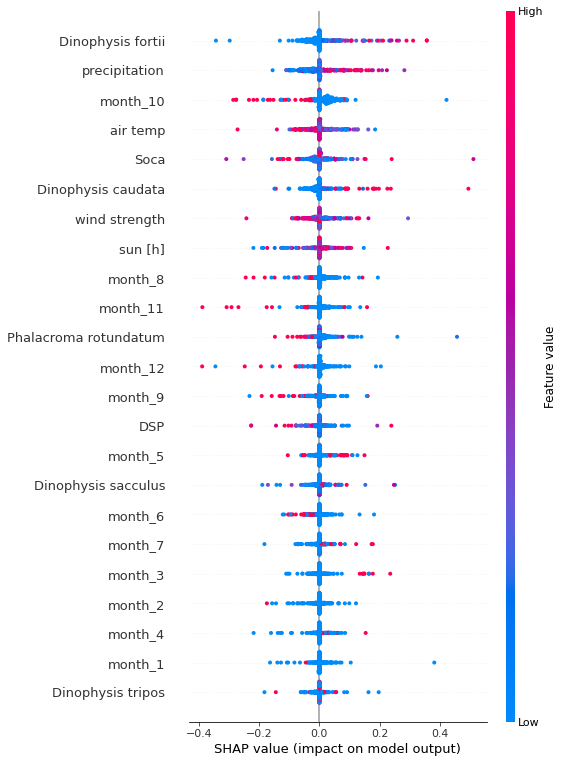

In [6]:
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_test,50))
shap_values = explainer.shap_values(X_test, nsamples=50)
for classid in [0,1]:
    shap.summary_plot(shap_values[classid], X_test, max_display=len(X.columns), class_names=le.classes_)

Now let's explain the prediction of a single instance. We will show the explanation of the bigger predicted probability to see why the model decided as it did.
But in practice we could be interested only in the explanation of the probability of the positive prediction.

In [7]:
instanceID = 10
instance = X.iloc[[instanceID]]
display_instance = X_display.iloc[[instanceID]]

prediction = model.predict(instance)[0]
prediction_probs = model.predict_proba(instance)[0]
print(f'real value: {y[instanceID]}, \npredicted: {prediction}, \npredicted probs: {prediction_probs}')
max_p_id = prediction_probs.argmax()  # we will show the explanation of the bigger predicted probability
print(f'Explanation for prediction: class={max_p_id}, p={prediction_probs.max()}')

explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X, 50))
shap_values = explainer.shap_values(instance, nsamples=500)
shap.force_plot(explainer.expected_value[max_p_id], shap_values[max_p_id], features=display_instance)

real value: 1, 
predicted: 0, 
predicted probs: [0.63014862 0.36985138]
Explanation for prediction: class=0, p=0.630148624353563


  0%|          | 0/1 [00:00<?, ?it/s]

Show the mean values of features as it may help understanding this particular instance data in the plot above.

In [8]:
pd.DataFrame([data[data['lipophylic_toxins']=='neg'].mean(), data[data['lipophylic_toxins']=='poz'].mean()], index=['neg','pos']).T

,neg,pos
DSP,102.700503,195.860294
Dinophysis caudata,25.537688,40.543382
Dinophysis fortii,23.725829,72.827941
Phalacroma rotundatum,16.438492,13.510294
Dinophysis sacculus,24.474070,52.823529
Dinophysis tripos,4.902513,8.235294
sun [h],165.682714,152.191912
air temp,17.423881,16.944328
wind strength,2.996569,2.921674
precipitation,56.516382,75.321324
